In [74]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)
import matplotlib.font_manager as fm
font_path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
font_prop = fm.FontProperties(fname=font_path, size=20)
import seaborn as sns

In [77]:
gu=['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구','도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구']
su=[]
dv=webdriver.Chrome()
dv.get('http://www.nsdi.go.kr/lxportal/?menuno=4085')
elem = dv.find_element_by_name('shSido')
elem.send_keys('서울특별시')
for g in gu:
    elem2 = dv.find_element_by_name('shSigungu')
    elem2.send_keys(g)
    button = dv.find_element_by_id('icon_btn_write')
    button.click()
    time.sleep(1)
    soup = BeautifulSoup(dv.page_source, 'html.parser')
    result= soup.select_one('p.allTxt > span')
    su.append(result.text)

In [78]:
df=pd.DataFrame({'지역':gu,'사무소 개수':su})

In [81]:
gu=['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구','도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구']
su=[]
dv=webdriver.Chrome()
dv.get('http://www.nsdi.go.kr/lxportal/?menuno=4085')
elem = dv.find_element_by_name('shSido')
elem.send_keys('서울특별시')
elem3 = dv.find_element_by_name('shSelect')
elem3.send_keys('중개사/보조원')
for g in gu:
    elem2 = dv.find_element_by_name('shSigungu')
    elem2.send_keys(g)
    button = dv.find_element_by_id('icon_btn_write')
    button.click()
    time.sleep(2)
    soup = BeautifulSoup(dv.page_source, 'html.parser')
    result= soup.select_one('p.allTxt > span')
    su.append(result.text)


In [82]:
df1=pd.DataFrame({'지역':gu,'노동자 수':su})

In [84]:
dv.close()

In [87]:
df['사무소 개수']=df['사무소 개수'].map(lambda x : int(x.replace(',','')))

In [88]:
df1['노동자 수']=df1['노동자 수'].map(lambda x : int(x.replace(',','')))

In [89]:
df.isna().sum()

지역        0
사무소 개수    0
dtype: int64

In [90]:
df1.isna().sum()

지역       0
노동자 수    0
dtype: int64

In [91]:
df_seoul = pd.merge(df,df1)

In [92]:
df_seoul # 노동자 수 : 중개사 + 중개보조원

,지역,사무소 개수,노동자 수
0,강남구,2844,7760
1,강동구,1276,2112
2,강북구,640,1084
3,강서구,1463,2957
4,관악구,1122,2832
5,광진구,917,1519
6,구로구,845,1432
7,금천구,665,1313
8,노원구,780,1264
9,도봉구,530,832


In [ ]:
df_seoul.info()

In [93]:
df_seoul.to_csv("df_seoul.csv",index=False) #08.26기준

In [ ]:
#####################################경계선 ##################################################

# 여기부터 시작

In [ ]:
###########################################################

In [ ]:
################################################################################################

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)
import matplotlib.font_manager as fm
font_path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
font_prop = fm.FontProperties(fname=font_path, size=20)
import seaborn as sns

In [2]:
df_seoul=pd.read_csv('df_seoul.csv')

In [94]:
df_seoul['사무소 개수'].sum()

26646

In [95]:
df_seoul.columns=['지역','사무소','근무자']

In [5]:
samuso=pd.read_excel('datata/시도별개업공인중개사등록현황.xlsx')

In [6]:
samuso.index=samuso['분기(Quarterly)']

In [105]:
samuso

,분기(Quarterly),구 분,계,공인중개사,중개인,중개법인
분기(Quarterly),,,,,,
2000/01,2000/01,서 울,15644,7164,8312,168
2000/02,2000/02,서 울,15815,7439,8191,185
2000/03,2000/03,서 울,15923,7613,8117,193
2000/04,2000/04,서 울,16170,7936,7993,241
2001/01,2001/01,서 울,16382,8276,7880,226
...,...,...,...,...,...,...
2020/02,2020/02,서 울,25702,23857,1098,747
2020/03,2020/03,서 울,26052,24189,1096,767
2020/04,2020/04,서 울,26056,24193,1077,786


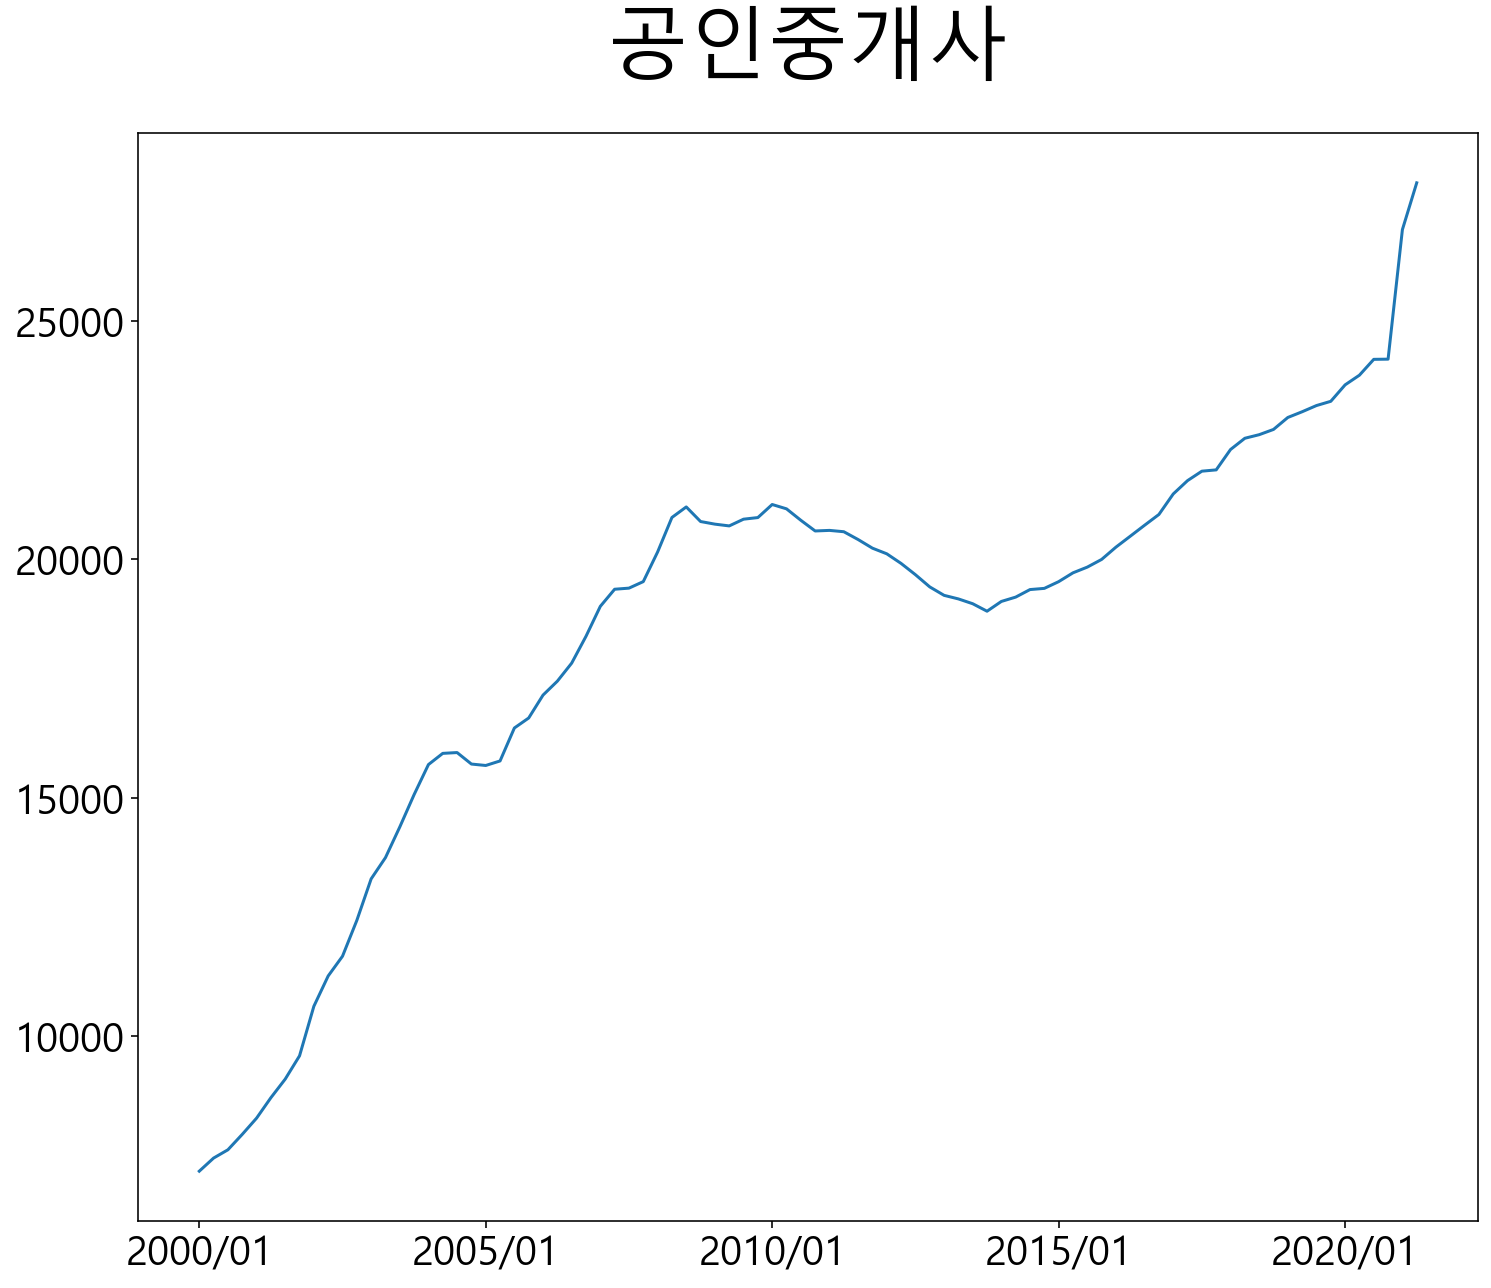

In [69]:
samuso['공인중개사'].plot(figsize=(12,10),fontsize=20,xlabel='')
plt.title('공인중개사', pad=30, fontsize=40)
plt.savefig('data/서울시공인중개사.png')

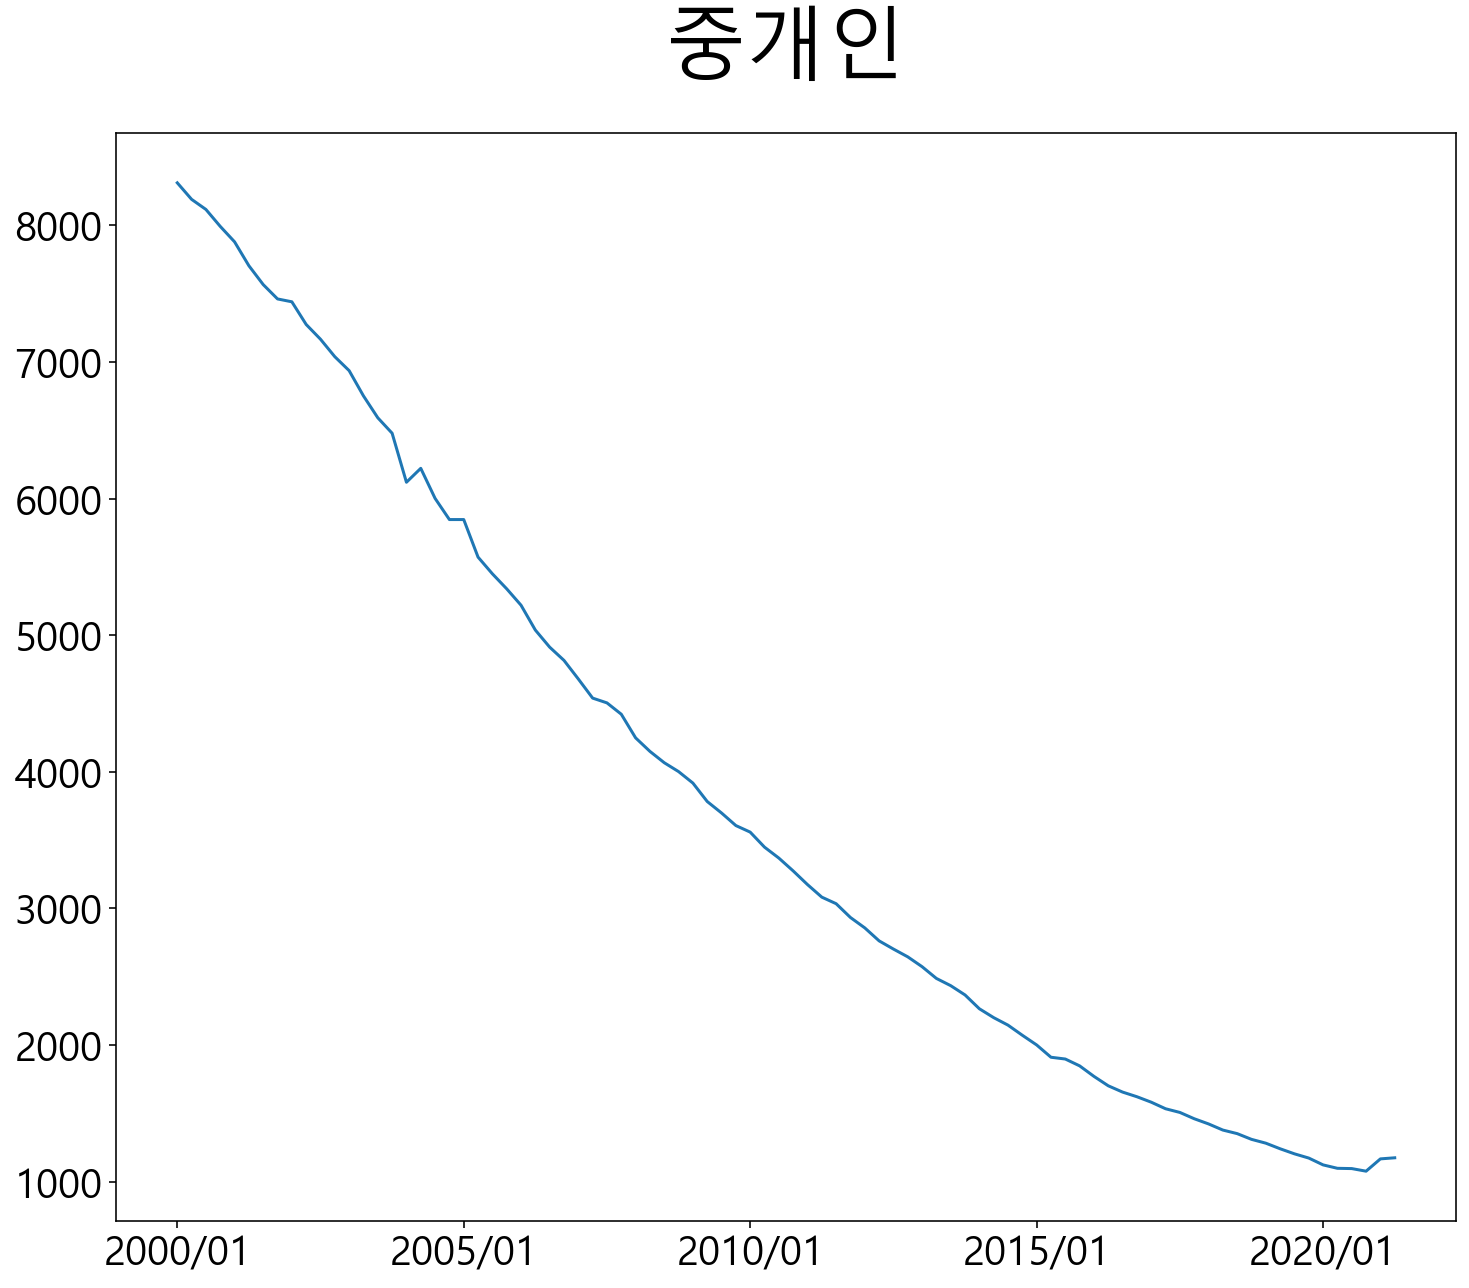

In [10]:
samuso['중개인'].plot(figsize=(12,10),fontsize=20,xlabel='')
plt.title('중개인', pad=30, fontsize=40)
plt.savefig('data/서울시중개인.png')

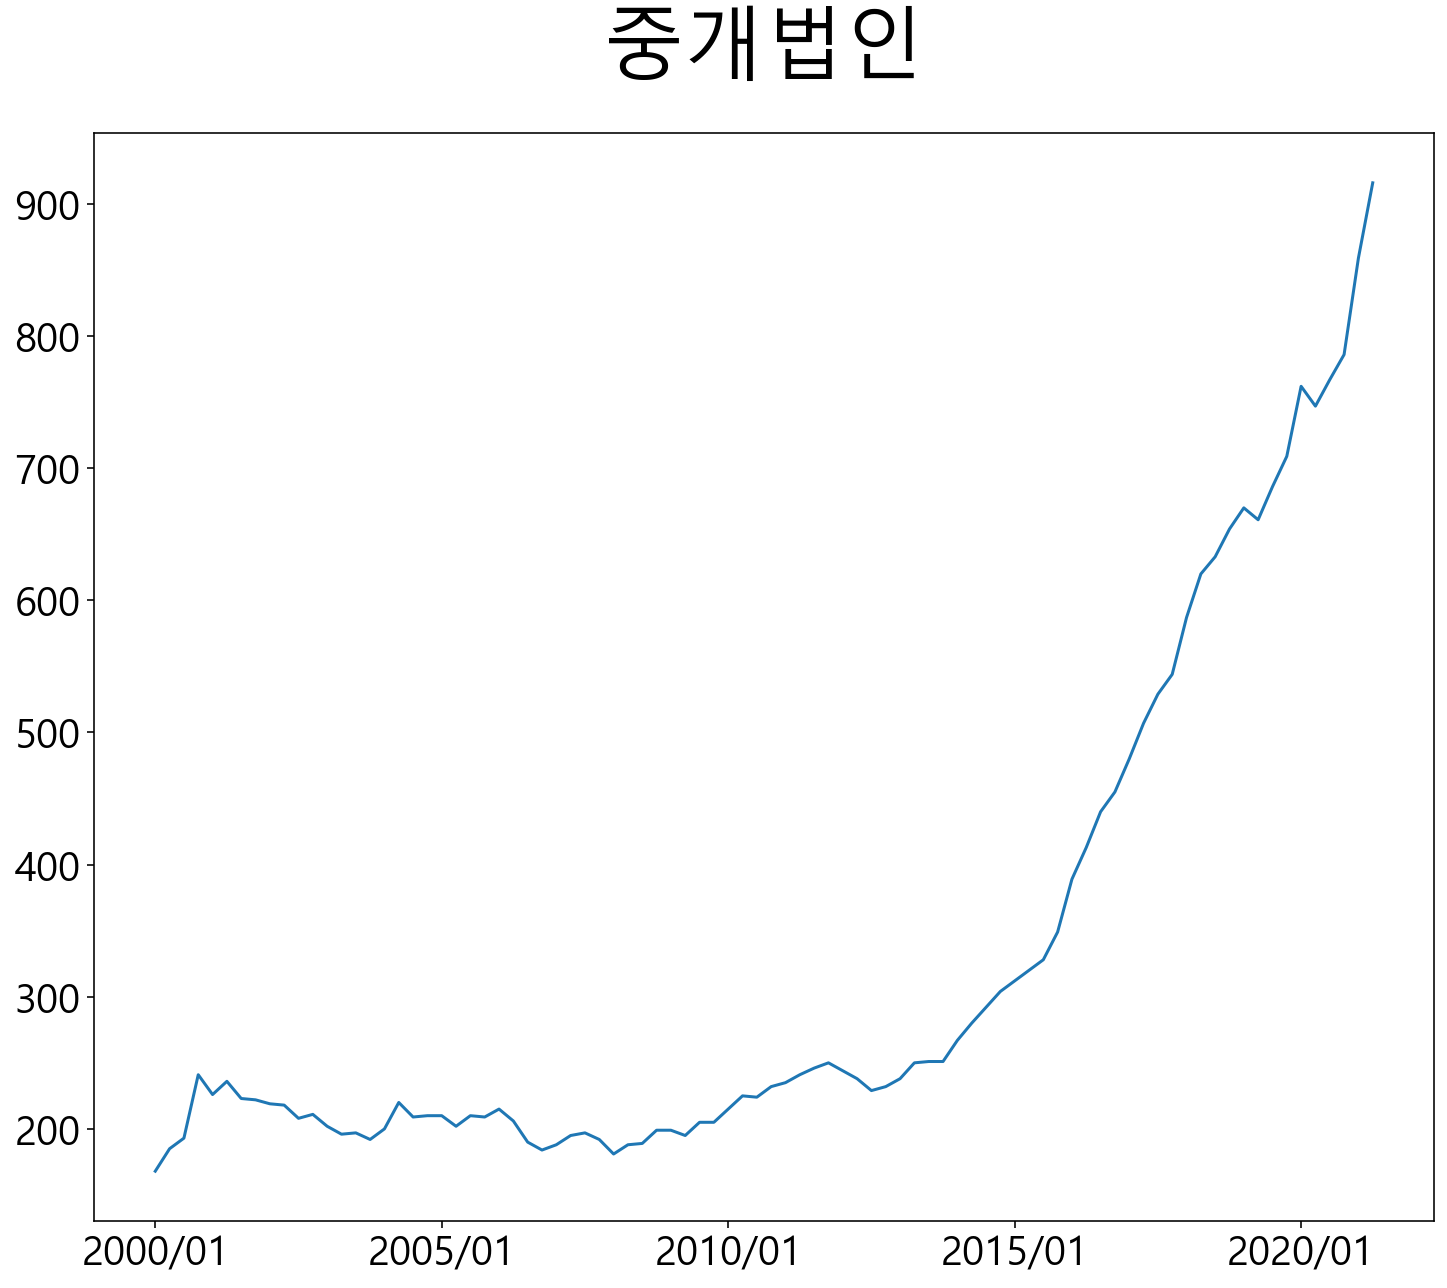

In [9]:
samuso['중개법인'].plot(figsize=(12,10),fontsize=20,xlabel='')
plt.title('중개법인', pad=30, fontsize=40)
plt.savefig('data/서울시중개법인.png')

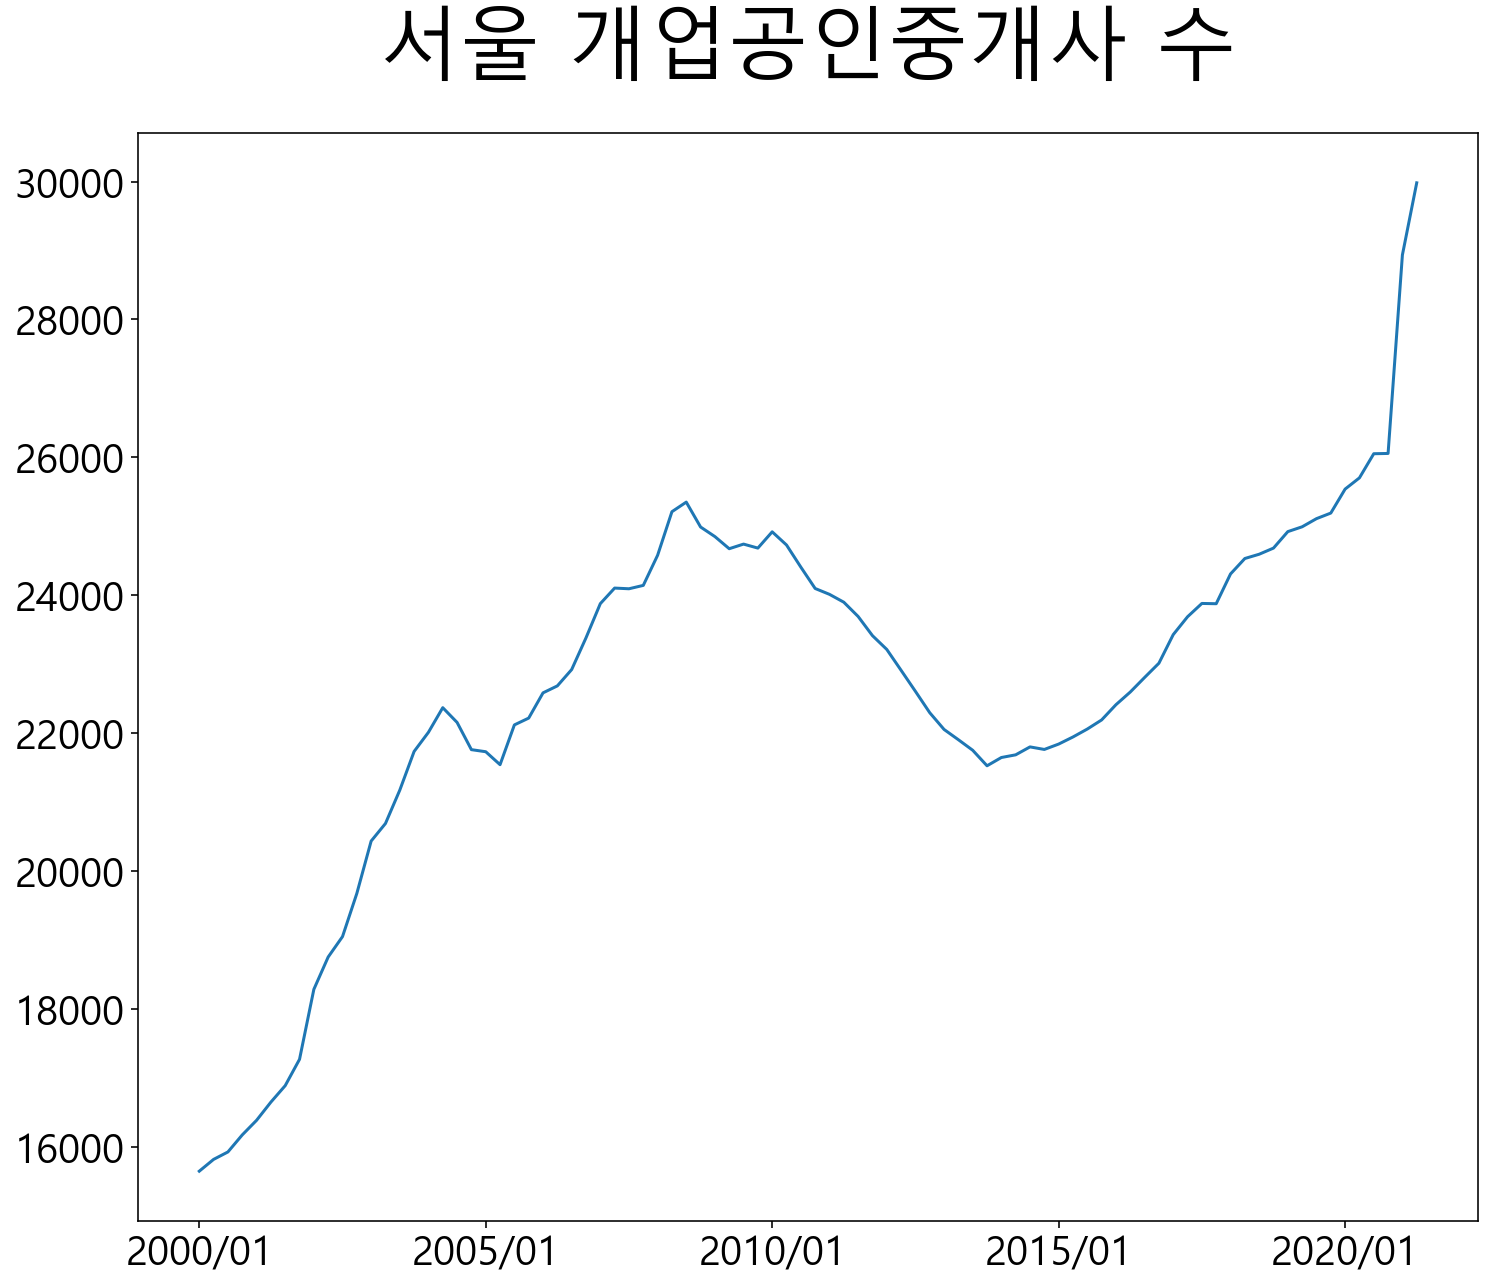

In [67]:
samuso['계'].plot(figsize=(12,10),fontsize=20,xlabel='')
plt.title('서울 개업공인중개사 수', pad=30, fontsize=40)
plt.savefig('data/서울시중개.png')

In [96]:
df_seoul_melted=df_seoul.melt(id_vars='지역').copy()

In [19]:
samuso

,분기(Quarterly),구 분,계,공인중개사,중개인,중개법인
분기(Quarterly),,,,,,
2000/01,2000/01,서 울,15644,7164,8312,168
2000/02,2000/02,서 울,15815,7439,8191,185
2000/03,2000/03,서 울,15923,7613,8117,193
2000/04,2000/04,서 울,16170,7936,7993,241
2001/01,2001/01,서 울,16382,8276,7880,226
...,...,...,...,...,...,...
2020/02,2020/02,서 울,25702,23857,1098,747
2020/03,2020/03,서 울,26052,24189,1096,767
2020/04,2020/04,서 울,26056,24193,1077,786


In [103]:
df_seoul.loc[13:]

,지역,사무소,근무자
13,서대문구,755,1260
14,서초구,1693,3735
15,성동구,871,1557
16,성북구,921,1413
17,송파구,1843,3491
18,양천구,981,1668
19,영등포구,1209,2233
20,용산구,918,1602
21,은평구,1276,2023
22,종로구,595,1079


In [99]:
df_seoul_melted

,지역,variable,value
0,강남구,사무소,2844
1,강동구,사무소,1276
2,강북구,사무소,640
3,강서구,사무소,1463
4,관악구,사무소,1122
5,광진구,사무소,917
6,구로구,사무소,845
7,금천구,사무소,665
8,노원구,사무소,780
9,도봉구,사무소,530


In [111]:
samuso.drop(labels=['분기(Quarterly)','구 분'],axis=1).T

분기(Quarterly),2000/01,2000/02,2000/03,2000/04,2001/01,2001/02,2001/03,2001/04,2002/01,2002/02,...,2019/01,2019/02,2019/03,2019/04,2020/01,2020/02,2020/03,2020/04,2021/01,2021/02
계,15644,15815,15923,16170,16382,16646,16885,17267,18282,18751,...,24922,24992,25110,25191,25539,25702,26052,26056,28936,29982
공인중개사,7164,7439,7613,7936,8276,8705,9095,9583,10622,11258,...,22970,23090,23220,23309,23654,23857,24189,24193,26910,27891
중개인,8312,8191,8117,7993,7880,7705,7567,7462,7441,7275,...,1282,1241,1204,1173,1123,1098,1096,1077,1167,1175
중개법인,168,185,193,241,226,236,223,222,219,218,...,670,661,686,709,762,747,767,786,859,916


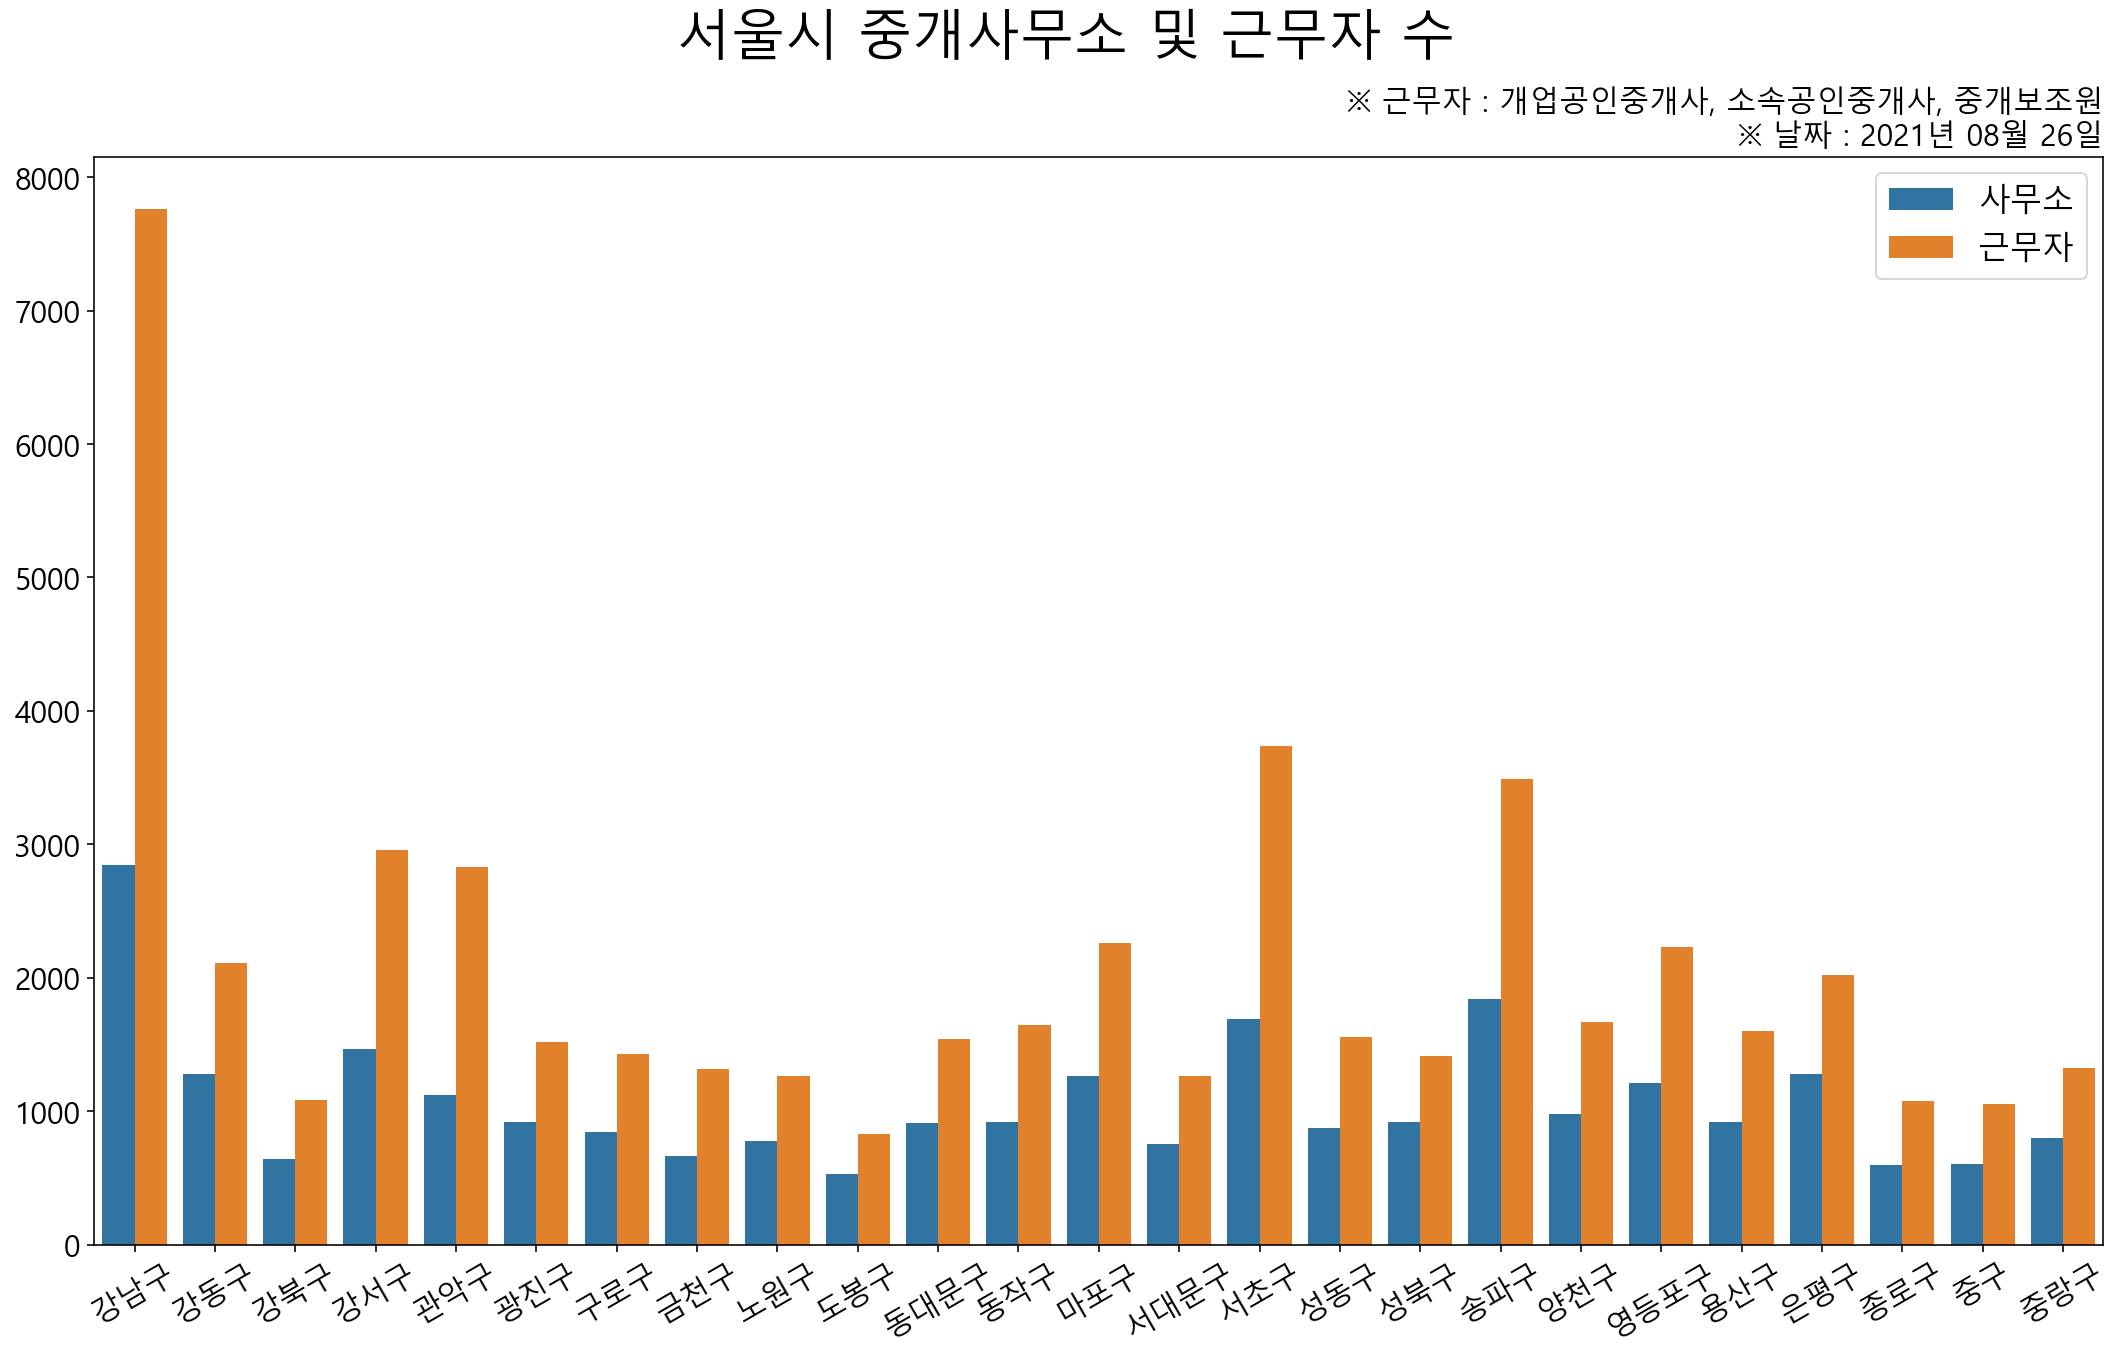

In [101]:
plt.figure(figsize=(18,10))
g=sns.barplot(data=df_seoul_melted,x='지역',y='value',hue='variable',)
g.set_xticklabels(labels=df_seoul['지역'],rotation=30, size=15)
g.legend(prop={'size': 16})
a=g.get_yticks()
a=[int(i) for i in a]
g.set_yticklabels(labels=a, size = 15)
g.set_xlabel(None) 
g.set_ylabel(None)
plt.title('※ 근무자 : 개업공인중개사, 소속공인중개사, 중개보조원\n※ 날짜 : 2021년 08월 26일', loc='right', fontsize=15)
plt.suptitle('서울시 중개사무소 및 근무자 수',fontsize=27)
plt.savefig('data/사무소근무자수.png')

In [ ]:
##################################################

# 여기부터 시작

In [116]:
#######################################################

In [206]:
apart2011=pd.read_csv('seoul_trade/2020/아파트20110826.csv',skiprows=15, encoding='cp949')
apart2012=pd.read_csv('seoul_trade/2020/아파트20120826.csv',skiprows=15, encoding='cp949')
apart2013=pd.read_csv('seoul_trade/2020/아파트20130826.csv',skiprows=15, encoding='cp949')
apart2014=pd.read_csv('seoul_trade/2020/아파트20140826.csv',skiprows=15, encoding='cp949')
apart2015=pd.read_csv('seoul_trade/2020/아파트20150826.csv',skiprows=15, encoding='cp949')
apart2016=pd.read_csv('seoul_trade/2020/아파트20160826.csv',skiprows=15, encoding='cp949')
apart2017=pd.read_csv('seoul_trade/2020/아파트20170826.csv',skiprows=15, encoding='cp949')
apart2018=pd.read_csv('seoul_trade/2020/아파트20180826.csv',skiprows=15, encoding='cp949')
apart2019=pd.read_csv('seoul_trade/2020/아파트20190826.csv',skiprows=15, encoding='cp949')
apart2020=pd.read_csv('seoul_trade/2020/아파트20200826.csv',skiprows=15, encoding='cp949')

In [207]:
apart2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38452 entries, 0 to 38451
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       38452 non-null  object 
 1   번지        38452 non-null  object 
 2   본번        38452 non-null  int64  
 3   부번        38452 non-null  int64  
 4   단지명       38452 non-null  object 
 5   전용면적(㎡)   38452 non-null  float64
 6   계약년월      38452 non-null  int64  
 7   계약일       38452 non-null  int64  
 8   거래금액(만원)  38452 non-null  object 
 9   층         38452 non-null  int64  
 10  건축년도      38452 non-null  int64  
 11  도로명       38452 non-null  object 
 12  해제사유발생일   0 non-null      float64
dtypes: float64(2), int64(6), object(5)
memory usage: 3.8+ MB


In [208]:
apart2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52217 entries, 0 to 52216
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       52217 non-null  object 
 1   번지        52217 non-null  object 
 2   본번        52217 non-null  int64  
 3   부번        52217 non-null  int64  
 4   단지명       52217 non-null  object 
 5   전용면적(㎡)   52217 non-null  float64
 6   계약년월      52217 non-null  int64  
 7   계약일       52217 non-null  int64  
 8   거래금액(만원)  52217 non-null  object 
 9   층         52217 non-null  int64  
 10  건축년도      52217 non-null  int64  
 11  도로명       52217 non-null  object 
 12  해제사유발생일   0 non-null      float64
dtypes: float64(2), int64(6), object(5)
memory usage: 5.2+ MB


In [209]:
apart2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73252 entries, 0 to 73251
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       73252 non-null  object 
 1   번지        73252 non-null  object 
 2   본번        73252 non-null  int64  
 3   부번        73252 non-null  int64  
 4   단지명       73252 non-null  object 
 5   전용면적(㎡)   73252 non-null  float64
 6   계약년월      73252 non-null  int64  
 7   계약일       73252 non-null  int64  
 8   거래금액(만원)  73252 non-null  object 
 9   층         73252 non-null  int64  
 10  건축년도      73252 non-null  int64  
 11  도로명       73252 non-null  object 
 12  해제사유발생일   0 non-null      float64
dtypes: float64(2), int64(6), object(5)
memory usage: 7.3+ MB


In [210]:
apart2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109595 entries, 0 to 109594
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       109595 non-null  object 
 1   번지        109589 non-null  object 
 2   본번        109590 non-null  float64
 3   부번        109590 non-null  float64
 4   단지명       109595 non-null  object 
 5   전용면적(㎡)   109595 non-null  float64
 6   계약년월      109595 non-null  int64  
 7   계약일       109595 non-null  int64  
 8   거래금액(만원)  109595 non-null  object 
 9   층         109595 non-null  int64  
 10  건축년도      109595 non-null  int64  
 11  도로명       109595 non-null  object 
 12  해제사유발생일   0 non-null       float64
dtypes: float64(4), int64(4), object(5)
memory usage: 10.9+ MB


In [211]:
apart2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98311 entries, 0 to 98310
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       98311 non-null  object 
 1   번지        98307 non-null  object 
 2   본번        98308 non-null  float64
 3   부번        98308 non-null  float64
 4   단지명       98311 non-null  object 
 5   전용면적(㎡)   98311 non-null  float64
 6   계약년월      98311 non-null  int64  
 7   계약일       98311 non-null  int64  
 8   거래금액(만원)  98311 non-null  object 
 9   층         98311 non-null  int64  
 10  건축년도      98311 non-null  int64  
 11  도로명       98311 non-null  object 
 12  해제사유발생일   0 non-null      float64
dtypes: float64(4), int64(4), object(5)
memory usage: 9.8+ MB


In [212]:
apart2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102723 entries, 0 to 102722
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       102723 non-null  object 
 1   번지        102684 non-null  object 
 2   본번        102706 non-null  float64
 3   부번        102706 non-null  float64
 4   단지명       102723 non-null  object 
 5   전용면적(㎡)   102723 non-null  float64
 6   계약년월      102723 non-null  int64  
 7   계약일       102723 non-null  int64  
 8   거래금액(만원)  102723 non-null  object 
 9   층         102723 non-null  int64  
 10  건축년도      102723 non-null  int64  
 11  도로명       102723 non-null  object 
 12  해제사유발생일   0 non-null       float64
dtypes: float64(4), int64(4), object(5)
memory usage: 10.2+ MB


In [213]:
apart2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81729 entries, 0 to 81728
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       81729 non-null  object 
 1   번지        81651 non-null  object 
 2   본번        81718 non-null  float64
 3   부번        81718 non-null  float64
 4   단지명       81729 non-null  object 
 5   전용면적(㎡)   81729 non-null  float64
 6   계약년월      81729 non-null  int64  
 7   계약일       81729 non-null  int64  
 8   거래금액(만원)  81729 non-null  object 
 9   층         81729 non-null  int64  
 10  건축년도      81729 non-null  int64  
 11  도로명       81729 non-null  object 
 12  해제사유발생일   0 non-null      float64
dtypes: float64(4), int64(4), object(5)
memory usage: 8.1+ MB


In [214]:
apart2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43538 entries, 0 to 43537
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       43538 non-null  object 
 1   번지        43525 non-null  object 
 2   본번        43529 non-null  float64
 3   부번        43529 non-null  float64
 4   단지명       43538 non-null  object 
 5   전용면적(㎡)   43538 non-null  float64
 6   계약년월      43538 non-null  int64  
 7   계약일       43538 non-null  int64  
 8   거래금액(만원)  43538 non-null  object 
 9   층         43538 non-null  int64  
 10  건축년도      43538 non-null  int64  
 11  도로명       43538 non-null  object 
 12  해제사유발생일   0 non-null      float64
dtypes: float64(4), int64(4), object(5)
memory usage: 4.3+ MB


In [215]:
apart2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96167 entries, 0 to 96166
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       96167 non-null  object 
 1   번지        96137 non-null  object 
 2   본번        96158 non-null  float64
 3   부번        96158 non-null  float64
 4   단지명       96167 non-null  object 
 5   전용면적(㎡)   96167 non-null  float64
 6   계약년월      96167 non-null  int64  
 7   계약일       96167 non-null  int64  
 8   거래금액(만원)  96167 non-null  object 
 9   층         96167 non-null  int64  
 10  건축년도      96167 non-null  int64  
 11  도로명       96167 non-null  object 
 12  해제사유발생일   1961 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 9.5+ MB


In [216]:
apart2019=apart2019[apart2019['해제사유발생일'].isna()]

In [217]:
apart2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94206 entries, 0 to 96166
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       94206 non-null  object 
 1   번지        94177 non-null  object 
 2   본번        94197 non-null  float64
 3   부번        94197 non-null  float64
 4   단지명       94206 non-null  object 
 5   전용면적(㎡)   94206 non-null  float64
 6   계약년월      94206 non-null  int64  
 7   계약일       94206 non-null  int64  
 8   거래금액(만원)  94206 non-null  object 
 9   층         94206 non-null  int64  
 10  건축년도      94206 non-null  int64  
 11  도로명       94206 non-null  object 
 12  해제사유발생일   0 non-null      float64
dtypes: float64(4), int64(4), object(5)
memory usage: 10.1+ MB


In [218]:
apart2020=apart2020[apart2020['해제사유발생일'].isna()]

In [219]:
apart2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52634 entries, 0 to 54264
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       52634 non-null  object 
 1   번지        52617 non-null  object 
 2   본번        52625 non-null  float64
 3   부번        52625 non-null  float64
 4   단지명       52634 non-null  object 
 5   전용면적(㎡)   52634 non-null  float64
 6   계약년월      52634 non-null  int64  
 7   계약일       52634 non-null  int64  
 8   거래금액(만원)  52634 non-null  object 
 9   층         52634 non-null  int64  
 10  건축년도      52634 non-null  int64  
 11  도로명       52634 non-null  object 
 12  해제사유발생일   0 non-null      float64
dtypes: float64(4), int64(4), object(5)
memory usage: 5.6+ MB


In [220]:
apart2020.index=range(apart2020.shape[0])
apart2019.index=range(apart2019.shape[0])

In [221]:
apart=pd.concat([apart2011,apart2012,apart2013,apart2014,apart2015,apart2016,apart2017,apart2018,apart2019,apart2020])
apart

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201205,1,"66,000",4,1988,언주로 103,NaN
1,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201207,9,"58,000",2,1988,언주로 103,NaN
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201109,2,"85,000",5,1987,언주로 3,NaN
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,67.28,201112,17,"68,000",1,1987,언주로 3,NaN
4,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,133.46,201109,16,"126,500",7,1984,개포로 307,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52629,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),57.66,202102,27,"30,500",5,2003,동일로144길 74,NaN
52630,서울특별시 중랑구 중화동,274-75,274.0,75.0,한영(102),72.22,202105,4,"49,500",4,2003,동일로144길 74,NaN
52631,서울특별시 중랑구 중화동,274-76,274.0,76.0,한영(103),58.46,202107,1,"30,000",2,2003,동일로144길 74,NaN
52632,서울특별시 중랑구 중화동,11,11.0,0.0,현대휴앤미,100.17,202012,3,"54,800",5,2007,봉화산로27가길 23,NaN


In [222]:
apart.index=range(apart.shape[0])

In [223]:
apart

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201205,1,"66,000",4,1988,언주로 103,NaN
1,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201207,9,"58,000",2,1988,언주로 103,NaN
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201109,2,"85,000",5,1987,언주로 3,NaN
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,67.28,201112,17,"68,000",1,1987,언주로 3,NaN
4,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,133.46,201109,16,"126,500",7,1984,개포로 307,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
746652,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),57.66,202102,27,"30,500",5,2003,동일로144길 74,NaN
746653,서울특별시 중랑구 중화동,274-75,274.0,75.0,한영(102),72.22,202105,4,"49,500",4,2003,동일로144길 74,NaN
746654,서울특별시 중랑구 중화동,274-76,274.0,76.0,한영(103),58.46,202107,1,"30,000",2,2003,동일로144길 74,NaN
746655,서울특별시 중랑구 중화동,11,11.0,0.0,현대휴앤미,100.17,202012,3,"54,800",5,2007,봉화산로27가길 23,NaN


In [224]:
apart['계약날짜']=apart['계약년월']*100+apart['계약일']
apart=apart['계약날짜']
apart=apart.value_counts().to_frame().sort_index()

In [226]:
apart.columns=['거래량']
apart

,거래량
20110826,167
20110827,196
20110828,36
20110829,178
20110830,166
...,...
20210721,121
20210722,149
20210723,146
20210724,274
